In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 1.6 MB/s eta 0:00:00


In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 코랩

df = pd.read_csv('/content/hr_df.csv')

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# 주피터

#df = pd.read_csv('hr_df.csv')

In [ ]:
df.shape

# ✔ Over18 - Yes : 0  <- 어차피 다 0임 <- 열 삭제

(1470, 34)

#### ✔ 중복값 확인

In [ ]:
df.duplicated().sum()

0

#### ✔ 결측치 확인

In [ ]:
(df.isnull().sum()).sum()

0

#### ✔ Attrition - Yes : 0, No : 1로 변환

In [ ]:
df['Attrition'] = df['Attrition'].replace({'Yes':0, 'No':1})

#### ✔ Gender - Male : 0, Female : 1 으로 변환

In [ ]:
df['Gender'] = df['Gender'].replace({'Male':0, "Female":1})

#### ✔ OverTime - Yes : 0, No : 1로 변환

In [ ]:
df['OverTime'] = df['OverTime'].replace({'Yes':0, 'No':1})

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### ✔ 상관관계 확인

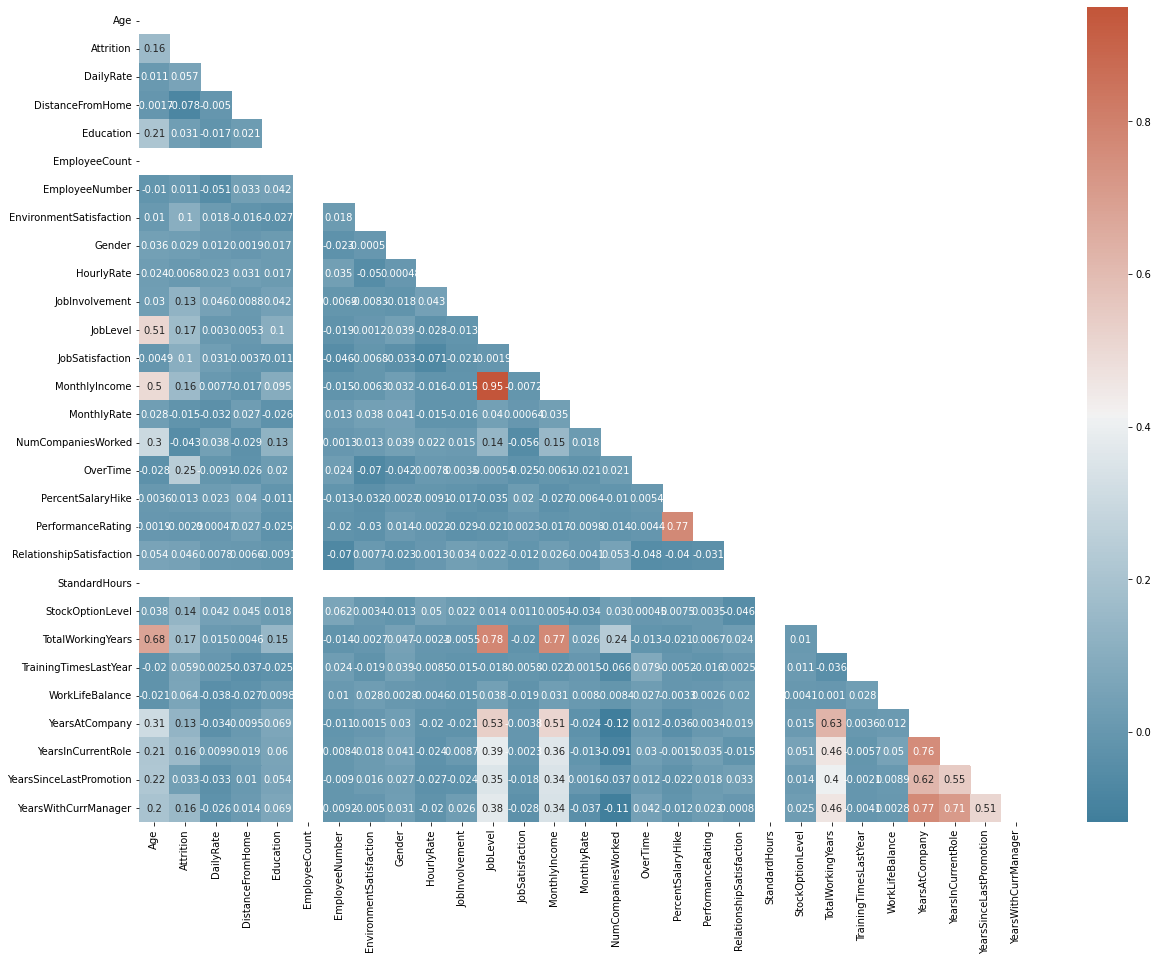

In [ ]:
# correlations of variables

import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

<상관관계 결과>

- 월 소득 - job level : 0.95

- 총 근속 연수 - job level : 0.78

- 총 근속 연수 - 월 소득 : 0.77

- 성과 평가 - 급여 인상 : 0.77

- 재직 기간 - 현 매니저와의 근속 연수 : 0.77

- 현재 역할을 수행한 기간 - 회사에서의 기간 : 0.76

- 회사에서의 재직기간 - 현 매니저와의 근속 연수 : 0.71

- 총 근무 년수 - 나이 : 0.68

### ✔ 모델링

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# 테스트 사이즈 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train, test 데이터가 잘 나눠졌는지 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 33), (294, 33), (1176,), (294,))

#### ✔ 원핫인코딩

In [ ]:
cat = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [ ]:
from category_encoders import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(df[cat])

OneHotEncoder(cols=['BusinessTravel', 'Department', 'EducationField', 'JobRole',
                    'MaritalStatus'],
              handle_unknown='ignore')

In [ ]:
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [ ]:
X_train

,Age,BusinessTravel_1,BusinessTravel_2,BusinessTravel_3,DailyRate,Department_1,Department_2,Department_3,DistanceFromHome,Education,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,24,1,0,0,350,1,0,0,21,2,...,2,80,3,2,3,3,1,1,0,0
727,18,0,1,0,287,1,0,0,5,2,...,4,80,0,0,2,3,0,0,0,0
254,29,1,0,0,1247,0,1,0,20,2,...,4,80,1,10,2,3,3,2,0,2
1175,39,1,0,0,492,1,0,0,12,3,...,3,80,0,7,3,3,5,4,1,0
1341,31,1,0,0,311,1,0,0,20,3,...,1,80,1,10,2,3,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,1,0,0,750,1,0,0,28,3,...,4,80,2,10,3,2,10,9,6,8
1294,41,1,0,0,447,1,0,0,5,3,...,1,80,0,11,3,1,3,2,1,2
860,22,0,0,1,1256,1,0,0,3,4,...,2,80,1,1,5,3,0,0,0,0
1459,29,1,0,0,1378,1,0,0,13,2,...,1,80,1,10,2,3,4,3,0,3


In [ ]:
# 문자형 데이터가 없는 것 확인

(X_train.dtypes == 'object').sum()

0

#### ✔ 모델링

In [ ]:
# 기준 모델 

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error

base = y_train.mode()[0]
# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듦. 기준모델로 예측
baseline = len(y_train) * [base]

baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델 정확도: {baseline_acc.round(2)}')


baseline_r2 = r2_score(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')

baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 mae : {baseline_mae}')

기준모델 정확도: 0.83
기준모델의 r2_score: -0.2024539877300615
기준모델의 mae : 0.1683673469387755


In [ ]:
# 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test accuracy score:' + str(model.score(X_test, y_test))) #accuracy

Train accuracy score: 0.8324829931972789
Test accuracy score:0.8673469387755102


In [ ]:
# 랜덤포레스트

model = RandomForestClassifier() 
model.fit(X_train,y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

Train accuracy score: 1.0
Test accuracy score:0.8707482993197279


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBoost

model = XGBClassifier() 
model.fit(X_train,y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

Train accuracy score: 0.9498299319727891
Test accuracy score:0.8877551020408163


#### ✔ XGBoost Test accuracy score:0.89

 -

#### ✔ 순열중요도 (PDP)

In [ ]:
!pip3 install pdpbox

In [ ]:
!pip install catboost

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0224 ± 0.0180,OverTime
0.0170 ± 0.0129,JobSatisfaction
0.0163 ± 0.0067,EnvironmentSatisfaction
0.0102 ± 0.0114,Age
0.0082 ± 0.0054,NumCompaniesWorked
0.0075 ± 0.0157,DistanceFromHome
0.0061 ± 0.0090,JobInvolvement
0.0054 ± 0.0054,MonthlyRate
0.0054 ± 0.0033,JobRole_3
0.0048 ± 0.0092,YearsWithCurrManager


#### ✔ 특성 중요도

Text(0.5, 1.0, 'Permutation feature Importance')

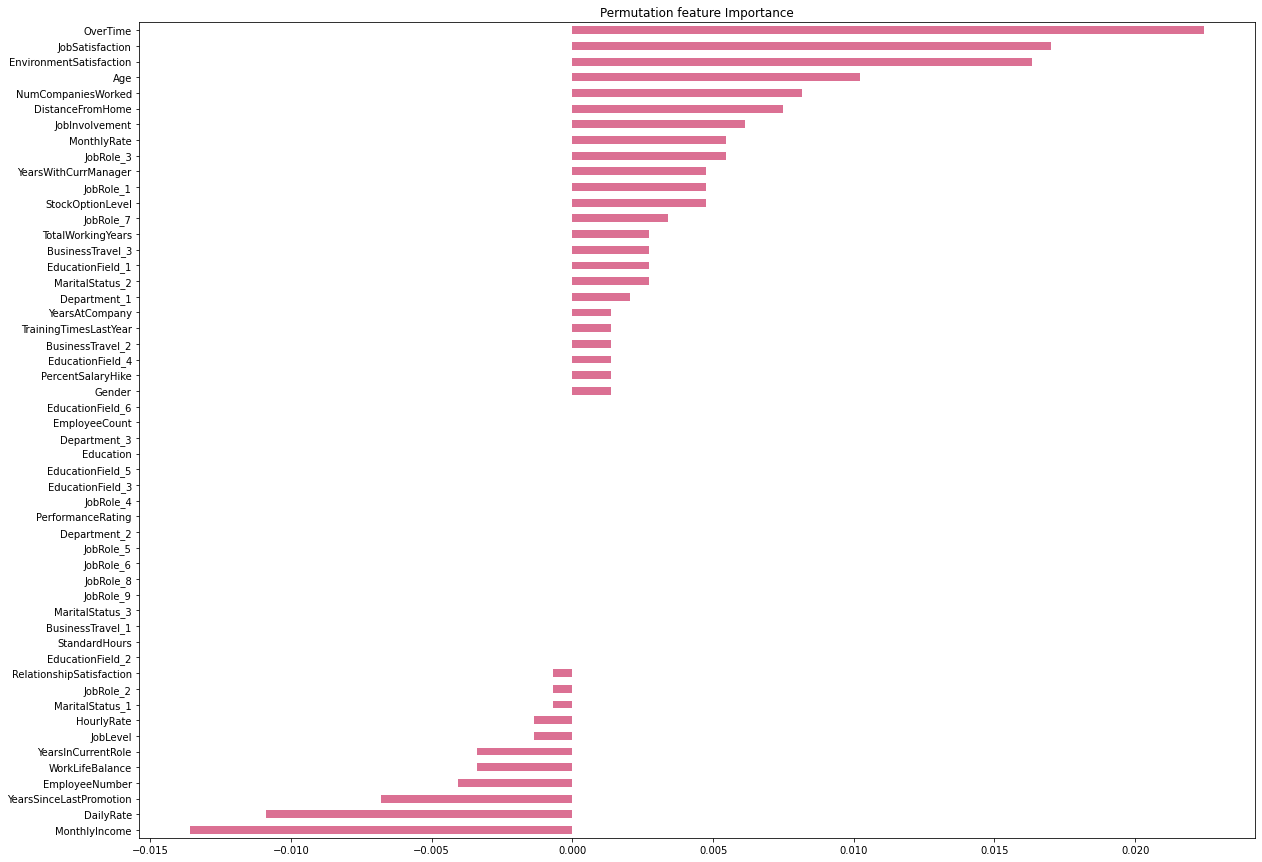

In [ ]:
feature_names = X_test.columns.tolist()
pi = pd.Series(perm.feature_importances_, feature_names).sort_values()
plt.figure(figsize=(20,15))
pi.plot.barh(color = 'palevioletred')
plt.title("Permutation feature Importance")

1. 초과 근무

2. 직업 만족도

3. 환경 만족도

4. 나이

5. 회사에서 일한 년도 (근속 년수)

### ✔ 테스트

In [ ]:
test_1 = pd.DataFrame([[20, 1, 0, 0, 110, 1, 0, 0, 80, 4, 
                       1, 0, 0, 0, 0, 0, 1, 26, 5, 0, 
                       94, 1, 3, 0, 0, 0, 1, 0, 0, 0, 
                       0, 0, 5, 0, 1, 0, 
                       16000, 20000, 1, 1, 11, 3, 1, 80, 0, 8, 
                       0, 1, 6, 4, 0, 5]], 
                      columns=['Age', 'BusinessTravel_1', 'BusinessTravel_2', 'BusinessTravel_3', 'DailyRate', 'Department_1', 'Department_2', 'Department_3', 'DistanceFromHome', 'Education', 
                               'EducationField_1', 'EducationField_2', 'EducationField_3', 'EducationField_4', 'EducationField_5', 'EducationField_6', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 
                               'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole_1', 'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5', 'JobRole_6', 'JobRole_7', 
                               'JobRole_8', 'JobRole_9', 'JobSatisfaction', 'MaritalStatus_1', 'MaritalStatus_2', 'MaritalStatus_3', 
                               'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 
                               'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [ ]:
model.predict(test_1)

array([1])

- 초과 근무 -> 0 (N)

- 직업 만족도 -> 5

- 환경 만족도 -> 5

- 나이 -> 20

- 근무 년도 -> 1

#### ✔ 이탈 예정 X (No)

In [ ]:
test_2 = pd.DataFrame([[40, 1, 0, 0, 110, 1, 0, 0, 80, 4, 
                       1, 0, 0, 0, 0, 0, 1, 26, 1, 0, 
                       94, 1, 3, 0, 0, 0, 1, 0, 0, 0, 
                       0, 0, 1, 0, 1, 0, 
                       16000, 20000, 9, 0, 11, 3, 1, 80, 0, 8, 
                       0, 1, 6, 4, 0, 5]], 
                      columns=['Age', 'BusinessTravel_1', 'BusinessTravel_2', 'BusinessTravel_3', 'DailyRate', 'Department_1', 'Department_2', 'Department_3', 'DistanceFromHome', 'Education', 
                               'EducationField_1', 'EducationField_2', 'EducationField_3', 'EducationField_4', 'EducationField_5', 'EducationField_6', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 
                               'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole_1', 'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5', 'JobRole_6', 'JobRole_7', 
                               'JobRole_8', 'JobRole_9', 'JobSatisfaction', 'MaritalStatus_1', 'MaritalStatus_2', 'MaritalStatus_3', 
                               'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 
                               'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [ ]:
model.predict(test_2)

array([0])

- 초과 근무 -> 1 (Y)

- 직업 만족도 -> 1

- 환경 만족도 -> 1

- 나이 -> 40

- 근무 년도 -> 9

#### ✔ 이탈 예정 O (Yes)